# Transform an Entire Data Set

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# To avoid:
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized.
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

This code loads the data and corresponding labels.

In [3]:
dataset = tf.data.Dataset.list_files("../data/flooddata/*/*.csv", shuffle=False)
files = []
for file in dataset:
    files.append(file.numpy().decode())
labels = []
for file in files:
    labels.append(file.split("\\")[3])
labels = pd.Categorical(labels)
labels = labels.rename_categories(["0.0 ft", "0.19 ft", "2.5 ft", "4.5 ft"])

We create a new dataset in which we load all the files into arrays. Each array has three columns, which correspond to the acceleration in the x, y, and z direction. The channels are stored in columns, but to use this data to train a network, they need to be stored in rows. We can fix this by transposing the matrix.

In [4]:
def load_array(file):
    df = pd.read_csv(file)
    array = df.to_numpy().T
    return array

def create_dataset(files, labels):
    arrays = list(map(load_array, files))
    dataset = tf.data.Dataset.from_generator(lambda: iter(zip(arrays, labels)), output_types=(tf.float16, tf.string))
    return dataset

dataset = create_dataset(files, labels)

Show one signal.

tf.Tensor(
[[-0.466 -0.941  0.642  1.527 -0.154 -0.438  0.276 -0.311 -0.539 -0.425
   0.137  0.774 -0.808 -1.28   0.205  0.322  0.78  -0.394 -0.567  0.115
  -0.644 -0.055 -0.096  0.525 -1.252  0.233 -0.059  0.274  0.401  0.658
  -1.154 -0.128 -0.326  0.251  0.276  0.602  1.287  0.041  0.015  0.51
   0.227  0.391 -1.626  0.101  0.107  0.34  -0.134  0.617  0.241  0.187
  -0.818 -0.509  0.728 -0.651 -1.786 -1.847 -0.52  -0.72  -0.519  0.153
   1.179 -1.523 -0.399  0.304 -0.048 -0.286 -1.057 -0.458  0.611 -0.17
   0.144  0.877  0.585 -0.569  0.341  0.471  0.226 -1.656 -0.471  0.592
  -0.1   -0.315 -0.316  1.026 -0.32  -0.108  0.977 -0.342  0.771 -0.597
  -0.273  0.708 -0.914 -0.172  0.294  0.604  0.361  0.05   0.595  0.171
   0.424 -0.745 -0.809  0.335 -0.504  0.048]
 [-1.913 -2.207 -1.154  1.575  4.816  0.844 -3.139 -3.012 -0.897  3.984
   2.977 -0.549 -2.805 -1.27  -0.047  1.587  2.176  0.592 -1.92  -2.67
  -0.366  1.759  3.572  0.543 -1.87  -2.203 -0.725  1.03   2.588  1.066
  -0.557 -1

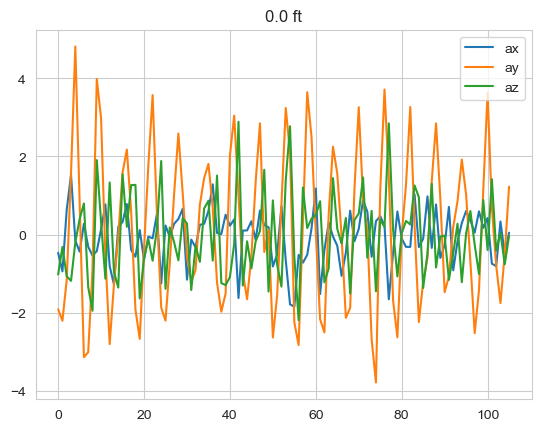

In [5]:
for signal, label in dataset.take(1):
    print(signal, label)
    plt.figure()
    plt.plot(signal.numpy().T)
    plt.title(label.numpy().decode())
    plt.legend(["ax", "ay", "az"])
    plt.show()